In [100]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
# import pandas as pd
# import scipy
# from scipy import optimize
import os
from adjustText import adjust_text
from textwrap import wrap

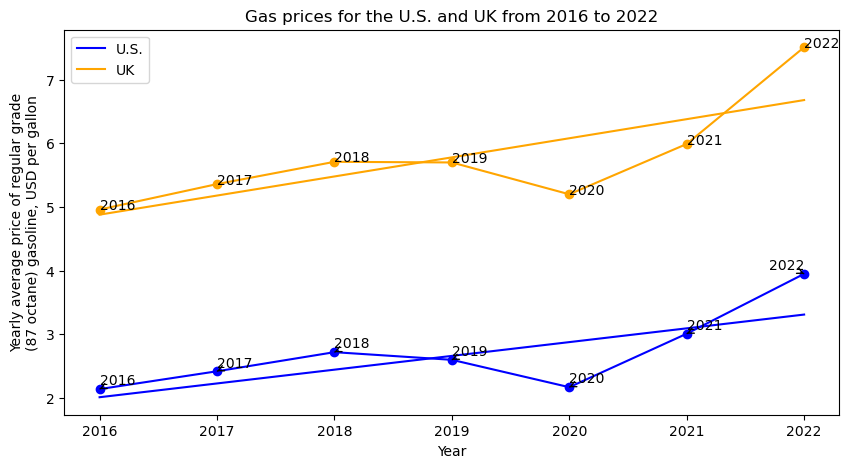

In [103]:
x = [2016, 2017, 2018, 2019, 2020, 2021, 2022]
y_us = [2.14, 2.42, 2.72, 2.6, 2.17, 3.01, 3.95]
y_europe = [4.96, 5.36, 5.71, 5.7, 5.2, 5.99, 7.51]

fig, ax = plt.subplots(figsize=(10,5))

# Add axis labels
ax.set_xlabel("Year")
y_label = "Yearly average price of regular grade (87 octane) gasoline, USD per gallon"
ax.set_ylabel('\n'.join(wrap(y_label, 40)))

# Add data to graph
ax.plot(x, y_us, "-o", color="blue")
ax.plot(x, y_europe, "-o", color="orange")


# US regression
polyline = np.linspace(min(x), max(x), 100)
polyspace = -434.25 + (polyline * 0.2164)
ax.plot(polyline, polyspace, label="U.S.", color="blue")

# Europe regression
polyline = np.linspace(min(x), max(x), 100)
polyspace = -599.92 + (polyline * 0.3)
ax.plot(polyline, polyspace, label="UK", color="orange")

# Text labels for US
point_labels = ["2016", "2017", "2018", "2019", "2020", "2021", "2022"]
text_labels = []
for x_vals, y_vals in zip(x, y_europe):
    text_labels.append(ax.annotate(point_labels[x.index(x_vals)], xy=(x_vals, y_vals)))

# Text labels for EU
point_labels = ["2016", "2017", "2018", "2019", "2020", "2021", "2022"]
text_labels = []
for x_vals, y_vals in zip(x, y_us):
    text_labels.append(ax.annotate(point_labels[x.index(x_vals)], xy=(x_vals, y_vals)))

# Change x scale
# plt.xlim(2006, 2100)
# plt.ylim(0, 6000000)

# correct adjust text
adjust_text(text_labels, only_move={'points':'y', 'texts':'y'}, arrowprops=dict(arrowstyle="->", color='k', lw=1))

plt.title("Gas prices for the U.S. and UK from 2016 to 2022")
ax.legend()
currentwd = os.getcwd().replace('\\', '/')
plt.savefig(f"{currentwd}/graphs/problem1.png", dpi=200)
plt.show()